# Загружаем Данные

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving sample_submission.csv to sample_submission.csv
Saving test_dataset_test.csv to test_dataset_test.csv
Saving train_dataset_train.csv to train_dataset_train.csv


# Загружаем данные в Pandas

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import re

import pandas as pd

In [ ]:
DF_train = pd.read_csv('/content/train_dataset_train.csv', delimiter = ',')
DF_train

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,...,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,Муж,ЦН,NaN,1992-04-18 00:00:00.000,NaN,NaN,NaN,...,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4
3,81661,19838,2017,Жен,БН,Английский язык,1994-12-08 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,35.0,74.000,4
4,81509,19803,2017,Жен,БН,Английский язык,1995-06-28 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,53.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13579,74283,17593,2016,Муж,ОО,Английский язык,1998-09-17 00:00:00.000,МБОУ СОШ №98,"Россия, Алтайский край, г Барнаул",2016.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,34.0,59.000,3
13580,71516,19433,2015,Жен,ОО,Немецкий язык,1997-09-19 00:00:00.000,"МКОУ ""Георгиевская СОШ""","Алтайский край, Ребрихинский р-н, Георгиевка с",2015.0,...,1.0,0,0.0,Россия,0.0,0.0,0.0,26.0,82.000,4
13581,76970,18723,2016,Муж,СН,Английский язык,1998-03-20 00:00:00.000,МБОУ СОШ №113 им. Сергея Семенова,"Россия, Алтайский край, г Барнаул",2016.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,3.400,4
13582,48548,14663,2012,Жен,ОО,NaN,1995-07-06 00:00:00.000,NaN,NaN,NaN,...,0.0,1,1.0,Россия,0.0,0.0,0.0,24.0,95.000,4


In [ ]:
DF_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      13584 non-null  int64         
 1   Код_группы              13584 non-null  category      
 2   Год_Поступления         13584 non-null  float64       
 3   Пол                     13577 non-null  category      
 4   Основания               13584 non-null  category      
 5   Изучаемый_Язык          12758 non-null  category      
 6   Дата_Рождения           13584 non-null  datetime64[ns]
 7   Уч_Заведение            12351 non-null  category      
 8   Где_Находится_УЗ        12203 non-null  category      
 9   Год_Окончания_УЗ        12284 non-null  float64       
 10  Пособие                 12576 non-null  category      
 11  Страна_ПП               13237 non-null  category      
 12  Регион_ПП               12966 non-null  catego

In [ ]:
DF_train.describe()

,ID,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
count,13584.000000,13584.000000,13584.000000,12284.000000,12576.0,13498.000000,13584.000000,13584.000000,13584.000000,13498.000000,13274.000000,13584.000000,13584.000000,13584.000000
mean,70096.056905,18302.499926,2014.992123,2013.876018,0.0,0.219884,0.511484,0.509570,0.000442,0.229441,0.070589,32.500368,73.223274,3.426458
std,12705.894531,2540.417956,2.595339,4.247111,0.0,0.414184,0.499886,0.499927,0.021013,0.420489,0.256147,8.458150,258.045027,1.071765
min,44632.000000,11550.000000,2001.000000,1973.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,-1.000000
25%,63496.750000,16901.000000,2013.000000,2013.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,47.000000,3.000000
50%,71401.500000,18534.500000,2015.000000,2015.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000,61.000000,4.000000
75%,78404.250000,20599.000000,2016.000000,2016.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,75.000000,4.000000
max,264403.000000,22824.000000,2212.000000,2020.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53.000000,5000.000000,4.000000


In [ ]:
DF_test = pd.read_csv('/content/test_dataset_test.csv', delimiter = ',')
DF_test

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата
0,64996,20608,2014,Жен,ДН,Английский язык,1995-11-03 00:00:00.000,"МБОУ ""СОШ №55""","Алтайский край, Барнаул г",2014.0,...,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,40.0,49.0
1,71837,20613,2015,Жен,ДН,Немецкий язык,1995-12-10 00:00:00.000,"МБОУ ""СОШ №1""","Алтайский край, Рубцовск г",2014.0,...,Барнаул г,0.0,0,0.0,Россия,0.0,1.0,0.0,26.0,77.0
2,86587,21210,2018,Жен,ОО,Английский язык,1973-08-09 00:00:00.000,Алтайский государственный медицинский университет,"Алтайский край, г. Барнаул",1997.0,...,г. Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,34.0,74.0
3,73673,22254,2015,Жен,ОО,Английский язык,1983-12-07 00:00:00.000,"ГОУ ВПО ""Алтайский государственный университет""","Алтайский край, Барнаул г",2006.0,...,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,53.0,57.0
4,54709,15040,2012,Жен,ОО,NaN,1994-05-21 00:00:00.000,NaN,NaN,NaN,...,NaN,0.0,1,1.0,Россия,0.0,0.0,0.0,36.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6686,74342,20680,2016,Муж,БН,Английский язык,1992-03-06 00:00:00.000,ГУ Павлодарский профессиональный лицей №7,"Казахстан, Павлодарская обл, г Павлодар",2011.0,...,Павлодар,1.0,1,1.0,Казахстан,0.0,0.0,1.0,34.0,77.0
6687,54876,16921,2013,Жен,ОО,NaN,1995-11-08 00:00:00.000,NaN,NaN,NaN,...,Чемал,0.0,1,1.0,Россия,0.0,0.0,0.0,36.0,62.0
6688,66879,19400,2014,Жен,СН,Английский язык,1996-03-31 00:00:00.000,"МБОУ ""Гимназия №42""","Алтайский край, Барнаул г",2014.0,...,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,26.0,52.0
6689,64982,18152,2014,Муж,ОО,Немецкий язык,1996-08-22 00:00:00.000,"МБОУ ""Ребрихинская СОШ""","Алтайский край, Ребрихинский р-н, Ребриха ст",2014.0,...,Ребриха с,1.0,0,0.0,Россия,0.0,1.0,0.0,27.0,69.0


In [ ]:
DF_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6691 entries, 0 to 6690
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6691 non-null   int64  
 1   Код_группы        6691 non-null   int64  
 2   Год_Поступления   6691 non-null   int64  
 3   Пол               6688 non-null   object 
 4   Основания         6691 non-null   object 
 5   Изучаемый_Язык    6295 non-null   object 
 6   Дата_Рождения     6691 non-null   object 
 7   Уч_Заведение      6113 non-null   object 
 8   Где_Находится_УЗ  6031 non-null   object 
 9   Год_Окончания_УЗ  6074 non-null   float64
 10  Пособие           6207 non-null   float64
 11  Страна_ПП         6531 non-null   object 
 12  Регион_ПП         6401 non-null   object 
 13  Город_ПП          6477 non-null   object 
 14  Общежитие         6656 non-null   float64
 15  Наличие_Матери    6691 non-null   int64  
 16  Наличие_Отца      6691 non-null   float64


In [ ]:
DF_test.describe()

,ID,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата
count,6691.000000,6691.000000,6691.000000,6074.000000,6207.0,6656.000000,6691.000000,6691.000000,6691.000000,6654.000000,6561.000000,6691.000000,6691.000000
mean,70202.034225,18310.805111,2014.991929,2013.800955,0.0,0.223407,0.501270,0.500673,0.000897,0.223024,0.071026,32.560155,71.681369
std,12763.462061,2523.533176,1.950492,4.450884,0.0,0.416560,0.500036,0.500037,0.029934,0.416305,0.256887,8.514496,250.386989
min,44602.000000,11574.000000,2006.000000,1966.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000
25%,64919.500000,16891.500000,2013.000000,2013.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,47.000000
50%,71380.000000,18537.000000,2015.000000,2015.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000,61.000000
75%,78370.500000,20601.000000,2016.000000,2016.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,76.000000
max,194044.000000,22753.000000,2020.000000,2020.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53.000000,7232.000000


**Объединим в 1 набор, чтобы делать одинаковые преобразования**

In [ ]:
DFs = [DF_train, DF_test]

# Чистка данных

In [ ]:
def cross_tab(DF= DF_train, col ='ID', target = 'Статус'):
    return pd.crosstab(index = DF[col],
                   columns = DF[target])

In [ ]:
def count_values(DF= DF_train, col ='ID'):
    return DF[col].value_counts()

**Разбираемся по порядку**

Столбец 'Год_Поступления'

In [ ]:
count_values(col = 'Год_Поступления')

2015    2353
2014    2290
2016    2271
2013    2070
2017    1460
2012    1394
2018    1147
2019     466
2020      48
2011      46
2010      19
2009       8
2007       5
2008       2
2212       1
2001       1
2004       1
2005       1
2003       1
Name: Год_Поступления, dtype: int64

In [ ]:
count_values(DF = DF_test, col = 'Год_Поступления')

2014    1177
2015    1172
2016    1114
2013    1028
2017     714
2012     637
2018     544
2019     227
2020      39
2011      23
2010       8
2009       5
2007       2
2006       1
Name: Год_Поступления, dtype: int64

In [ ]:
cross_tab(DF= DF_train, col ='Год_Окончания_УЗ', target = 'Год_Поступления')

Год_Поступления,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Год_Окончания_УЗ,,,,,,,,,,,,,
1973.0,0,0,0,0,0,0,0,0,0,1,0,0,0
1974.0,0,0,0,0,0,0,1,0,0,0,0,0,0
1979.0,0,0,0,0,0,1,0,0,0,0,0,0,0
1980.0,0,0,0,0,0,1,0,0,0,0,0,0,0
1982.0,0,0,0,0,0,0,0,0,2,0,0,0,0
1983.0,0,0,0,0,1,1,1,2,0,0,0,0,0
1984.0,0,0,0,0,0,1,0,1,0,2,1,0,0
1985.0,0,0,0,0,0,1,1,3,1,1,0,0,0
1987.0,0,0,0,0,0,1,0,3,0,0,0,0,0


In [ ]:
cross_tab(DF= DF_test, col ='Год_Окончания_УЗ', target = 'Год_Поступления')

Год_Поступления,2006,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Год_Окончания_УЗ,,,,,,,,,,,,,,
1966.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1979.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1981.0,0,0,0,0,0,0,0,0,1,2,0,0,0,0
1982.0,0,0,0,0,0,0,1,1,1,0,0,1,1,0
1983.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1984.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1985.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1986.0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1987.0,0,0,0,0,0,0,0,1,2,0,0,0,0,0


Есть одно аномальное значение - попробуем исправить

In [ ]:
DF_train.loc[DF_train['Год_Поступления']>2022,'Год_Поступления']=2012

**Гипотеза 1**

Возможно полезной фичей будет "поступил через много лет после окончания УЗ"

И еще нельзя поступить раньше, чем оканчивал, так что надо поправить

In [ ]:
(DF_train['Год_Поступления']-DF_train['Год_Окончания_УЗ']).value_counts()

 0.0     9234
 1.0      826
 2.0      585
 3.0      270
 4.0      202
 5.0      141
 6.0      126
 7.0      108
 8.0       92
 10.0      89
 9.0       86
 12.0      85
 11.0      69
 13.0      56
 15.0      38
 14.0      36
 17.0      34
 18.0      33
 16.0      27
 19.0      25
 20.0      19
 21.0      18
 22.0      13
 23.0      12
 24.0      11
 25.0       8
 26.0       7
 30.0       5
 28.0       5
 34.0       4
 27.0       3
 33.0       3
 29.0       3
 32.0       3
 31.0       3
 44.0       1
 40.0       1
-5.0        1
-3.0        1
-6.0        1
dtype: int64

In [ ]:
DF_train[(DF_train['Год_Поступления']-DF_train['Год_Окончания_УЗ'])<0]

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
5547,83586,21221,2012,Жен,ДН,Английский язык,1999-05-22 00:00:00.000,МБОУ СОШ №18,"Алтайский край, г. Бийск",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,48.0,4.600,4
7016,63396,16915,2007,Жен,СН,NaN,1990-05-28 00:00:00.000,"ФГБОУ ВПО ""Алтайский государственный университет""",Барнаул,2010.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,36.0,75.000,4
11794,88258,21221,2012,Жен,ДН,Английский язык,2000-05-23 00:00:00.000,МБОУ СОШ №8,"Алтайский край, г. Бийск",2018.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,48.0,4.266,4


Поступать в 12/13 лет или в 17 лет После Бакалавриата не очень правдоподобно 

Поэтому меняет на год окончания (это наиболее вероятный вариант)

In [ ]:
DF_train.loc[
    (DF_train['Год_Поступления'] - DF_train['Год_Окончания_УЗ'])<0,
             'Год_Поступления'] = DF_train.loc[
                 (DF_train['Год_Поступления']-DF_train['Год_Окончания_УЗ'])<0,
                 'Год_Окончания_УЗ']

In [ ]:
(DF_test['Год_Поступления']-DF_test['Год_Окончания_УЗ']).value_counts()

 0.0     4534
 1.0      432
 2.0      256
 3.0      150
 4.0      103
 5.0       83
 6.0       66
 9.0       54
 7.0       53
 8.0       44
 11.0      42
 12.0      32
 10.0      27
 13.0      27
 14.0      21
 16.0      18
 15.0      17
 19.0      16
 20.0      13
 21.0      11
 18.0      11
 17.0       9
 26.0       8
 23.0       7
 22.0       6
 24.0       6
 25.0       4
 28.0       4
 27.0       2
 29.0       2
 36.0       2
 31.0       2
 32.0       2
 35.0       2
-2.0        2
 34.0       1
 30.0       1
 49.0       1
-6.0        1
 37.0       1
 33.0       1
dtype: int64

In [ ]:
DF_test[(DF_test['Год_Поступления']-DF_test['Год_Окончания_УЗ'])<0]

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата
840,88253,21221,2016,Муж,ДН,Английский язык,2000-06-26 00:00:00.000,МБОУ СОШ №4 им. Виталия Валентиновича Бианки,"Алтайский край, г. Бийск",2018.0,...,г. Бийск,0.0,1,1.0,Россия,0.0,0.0,0.0,48.0,3.733
5176,88255,21221,2012,Жен,ДН,Английский язык,2000-10-19 00:00:00.000,МБОУ СОШ №8,"Алтайский край, г. Бийск",2018.0,...,г. Бийск,0.0,1,1.0,Россия,0.0,0.0,0.0,48.0,4.200
6311,88252,21221,2016,Жен,ДН,Английский язык,2000-07-14 00:00:00.000,МБОУ СОШ №34,"Алтайский край, г. Бийск",2018.0,...,г. Бийск,0.0,1,1.0,Россия,0.0,0.0,0.0,48.0,4.250


Аналогичная правка

In [ ]:
DF_test.loc[
    (DF_test['Год_Поступления']-DF_test['Год_Окончания_УЗ'])<0,
    'Год_Поступления'] = DF_test.loc[
        (DF_test['Год_Поступления']-DF_test['Год_Окончания_УЗ'])<0,
        'Год_Окончания_УЗ']

**Первая новая Фича**

Разность между поступление и окончанием

In [ ]:
for df in DFs:
    df['поступление-окончание'] = (df['Год_Поступления']-df['Год_Окончания_УЗ'])

**Разбираемся с Полом**

In [ ]:
display(count_values(DF=DF_train, col ='Пол'))

display(count_values(DF=DF_test, col ='Пол'))

Жен    8133
Муж    5443
муж       1
Name: Пол, dtype: int64

Жен    3974
Муж    2713
жен       1
Name: Пол, dtype: int64

Тут просто правим регистр,чтобы был одинаковым

In [ ]:
for df in DFs:
    df['Пол'] = df['Пол'].replace('муж','Муж')
    df['Пол'] = df['Пол'].replace('жен','Жен')

display(count_values(DF=DF_train, col ='Пол'))

display(count_values(DF=DF_test, col ='Пол'))

Жен    8133
Муж    5444
Name: Пол, dtype: int64

Жен    3975
Муж    2713
Name: Пол, dtype: int64

**Смотрим на Основания**

In [ ]:
display(count_values(DF=DF_train, col ='Основания'))

display(count_values(DF=DF_test, col ='Основания'))

ОО    5084
СН    4558
БН    1882
ДН    1853
ЦН     207
Name: Основания, dtype: int64

ОО    2565
СН    2177
ДН     972
БН     873
ЦН     103
ЛН       1
Name: Основания, dtype: int64

Скорее всего ЛН - это очепятка

In [ ]:
for df in DFs:
    df['Основания'] = df['Основания'].replace('ЛН','ДН')

**Смотрим на Изучаемый_Язык**

In [ ]:
display(count_values(DF=DF_train, col ='Изучаемый_Язык'))

display(count_values(DF=DF_test, col ='Изучаемый_Язык'))

Английский язык                  10450
Немецкий язык                     2219
Французский язык                    54
Русский язык                        11
Иностранный язык (Английский)       10
Англиийский                         10
Иностранный язык (Немецкий)          4
Name: Изучаемый_Язык, dtype: int64

Английский язык                  5202
Немецкий язык                    1047
Французский язык                   28
Англиийский                         8
Иностранный язык (Английский)       8
Русский язык                        1
Английский, немецкий языки          1
Name: Изучаемый_Язык, dtype: int64

Приводим к одному виду

In [ ]:
for df in DFs:
    df['Изучаемый_Язык'] = df['Изучаемый_Язык'].replace('Англиийский','Английский язык')
    df['Изучаемый_Язык'] = df['Изучаемый_Язык'].replace('Иностранный язык (Английский)','Английский язык')
    df['Изучаемый_Язык'] = df['Изучаемый_Язык'].replace('Иностранный язык (Немецкий)','Немецкий язык')
    df['Изучаемый_Язык'] = df['Изучаемый_Язык'].replace('Английский, немецкий языки','Английский язык')


display(count_values(DF=DF_train, col ='Изучаемый_Язык'))

display(count_values(DF=DF_test, col ='Изучаемый_Язык'))

Английский язык     10470
Немецкий язык        2223
Французский язык       54
Русский язык           11
Name: Изучаемый_Язык, dtype: int64

Английский язык     5219
Немецкий язык       1047
Французский язык      28
Русский язык           1
Name: Изучаемый_Язык, dtype: int64

Преобразуем дату рождения в более удобный формат и посчитаем переменную возраст

Добавляем различные фичи связанные с отдельными датами

In [ ]:
for df in DFs:
    df["Дата_Рождения"] = pd.to_datetime(df["Дата_Рождения"], 
                            format = '%Y-%m-%d')
    df["Дата_Рождения_год"] = pd.DatetimeIndex(df["Дата_Рождения"]).year
    #df["Дата_Рождения_месяц"] = pd.DatetimeIndex(df["Дата_Рождения"]).month
    #df["Дата_Рождения_день"] = pd.DatetimeIndex(df["Дата_Рождения"]).day
    #df["Дата_Рождения_деньгода"] = pd.DatetimeIndex(df["Дата_Рождения"]).dayofyear
    #df["Дата_Рождения_деньнедели"]= pd.DatetimeIndex(df["Дата_Рождения"]).weekday #видно в понедельник их мама родила
    df['Возраст'] =df["Год_Поступления"] - df["Дата_Рождения_год"]

In [ ]:
DF_train[DF_train['Статус']==-1]

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус,поступление-окончание,Дата_Рождения_год,Возраст
66,86225,21997,2018.0,Жен,ОО,Английский язык,2000-12-07,МБОУ СОШ №96,"Алтайский край, г. Барнаул",2018.0,...,Россия,0.0,0.0,0.0,31.0,62.00,-1,0.0,2000,18.0
70,84919,21911,2018.0,Муж,СН,Английский язык,2000-11-28,МБОУ Гимназия №40 им. Народного учителя СССР О...,"Алтайский край, г. Барнаул",2018.0,...,Россия,0.0,0.0,0.0,27.0,54.00,-1,0.0,2000,18.0
90,108117,22497,2020.0,Муж,ОО,NaN,1998-02-20,"ФГБОУ ВО ""Алтайский государственный университе...",NaN,NaN,...,Россия,0.0,0.0,0.0,24.0,87.00,-1,NaN,1998,22.0
93,83340,21707,2017.0,Жен,СН,Английский язык,1999-06-24,МБОУ СОШ №2,"Алтайский край, г. Горняк",2017.0,...,Россия,0.0,0.0,0.0,26.0,69.00,-1,0.0,1999,18.0
114,83430,21705,2017.0,Муж,ДН,Английский язык,1999-03-03,МБОУ Лицей №86,"Алтайский край, г. Барнаул",2017.0,...,Россия,0.0,0.0,0.0,26.0,47.00,-1,0.0,1999,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13322,90894,21978,2019.0,Жен,ОО,Немецкий язык,1998-10-07,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2019.0,...,Россия,0.0,1.0,0.0,30.0,65.00,-1,0.0,1998,21.0
13331,84173,22638,2017.0,Жен,СН,Немецкий язык,1983-09-15,ФГБОУ ВПО Алтайский государственный университет,"Алтайский край, г. Барнаул",2012.0,...,Россия,0.0,0.0,0.0,26.0,89.00,-1,5.0,1983,34.0
13337,82133,21781,2017.0,Муж,ОО,Английский язык,1999-12-25,СОШ №37,"Таджикистан, г. Душанбе, р-н Сино",2017.0,...,Таджикистан,0.0,0.0,1.0,24.0,61.00,-1,0.0,1999,18.0
13387,90350,22069,2019.0,Муж,ЦН,Немецкий язык,1978-02-24,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2000.0,...,Россия,0.0,0.0,0.0,34.0,70.00,-1,19.0,1978,41.0


# Новый раздел

**Смотрим на УЗ**

In [ ]:
display(count_values(DF=DF_train, col ='Уч_Заведение'))

display(count_values(DF=DF_test, col ='Уч_Заведение'))

ФГБОУ ВО Алтайский государственный университет                                   1359
ФГБОУ ВПО "Алтайский государственный университет"                                1025
ФГБОУ ВПО Алтайский государственный университет                                   113
ФГБОУ ВО Алтайский государственный технический университет им. И.И. Ползунова      88
Алтайский государственный университет                                              79
                                                                                 ... 
МБОУ "СОШ №89 с углублённым изучением отдельных предметов"                          1
МОУ"Солтонская СОШ"                                                                 1
МБОУ "Гимназия №3" г.Рубцовска Алтайский край                                       1
МБОУ СОШ №128                                                                       1
МКОУ "Георгиевская СОШ"                                                             1
Name: Уч_Заведение, Length: 3646, dtype: int64

ФГБОУ ВО Алтайский государственный университет                                   624
ФГБОУ ВПО "Алтайский государственный университет"                                532
ФГБОУ ВПО Алтайский государственный университет                                   60
ФГБОУ ВО Алтайский государственный технический университет им. И.И. Ползунова     47
МБОУ "Гимназия №42"                                                               40
                                                                                ... 
ФГБОУ ВО "Алтайский государственный университет" г. Барнаул                        1
КГБПОУ Бийский государствнный колледж                                              1
МБОУ "Ремзаводская СОШ" с. Павловск                                                1
СОУ №2                                                                             1
ГУ Павлодарский профессиональный лицей №7                                          1
Name: Уч_Заведение, Length: 2244, dtype: int64

In [ ]:
display(count_values(DF=DF_train[DF_train['Статус']==-1], col ='Уч_Заведение'))

ФГБОУ ВО Алтайский государственный университет                  96
ФГБОУ ВПО "Алтайский государственный университет"               11
МБОУ Гимназия №42                                               10
МБОУ Гимназия №22                                                7
МБОУ СОШ №1                                                      6
                                                                ..
КГУ СШ №1 им. М.В. Инюшина                                       1
КГУ СШ им. Т. Аманова                                            1
МБОУ "Павловская СОШ"                                            1
КГБПОУ "Алтайский колледж промышленных технологий и бизнеса"     1
СОШ №37                                                          1
Name: Уч_Заведение, Length: 363, dtype: int64

In [ ]:
pd.set_option("display.max_rows", 25)

Опять приходим к единообразию

Сначала поправим очевидные косяки и опечатки в популярных названиях

В основном с помощью регулярных выражений

Но иногда - точечные замены

In [ ]:
for df in DFs:
    df['Уч_Заведение'] = df['Уч_Заведение'].str.split('"').str.join("")
    df['Уч_Заведение'] = df['Уч_Заведение'].str.split('  ').str.join(" ")
    df['Уч_Заведение'] = df['Уч_Заведение'].str.split('.').str.join("")
    df['Уч_Заведение'] = [x.split(' г ')[0] for x in df['Уч_Заведение'].fillna("temp_NaN")]  
    df['Уч_Заведение'] = [x.split(' им')[0] for x in df['Уч_Заведение'].fillna("temp_NaN")] 
    df['Уч_Заведение'] = [x.split(' с')[0] for x in df['Уч_Заведение'].fillna("temp_NaN")]
    df['Уч_Заведение'] = [x.split(' города')[0] for x in df['Уч_Заведение'].fillna("temp_NaN")]
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(r"\bФГБОУ ВПО\b", 'ФГБОУ ВО', regex=True)    
    df['Уч_Заведение'] = df['Уч_Заведение'].replace('Томский политехнический университет',
                                                    'ФГБОУ ВО Национальный исследовательский Томский политехнический университет')
    df['Уч_Заведение'] = df['Уч_Заведение'].replace('Алтайский государственный университет',
                                                    'ФГБОУ ВО Алтайский государственный университет')
    df['Уч_Заведение'] = df['Уч_Заведение'].replace('Муниципальное бюджетное общеобразовательное учреждениеГельбштадтская СОШ',
                                                    'МБОУ Гельбштадтская СОШ')    
    df['Уч_Заведение'] = df['Уч_Заведение'].replace('Федеральное государственное бюджетное образовательное учреждение высшего образования «Алтайский государственный университет»',
                                                    'ФГБОУ ВО Алтайский государственный университет')    
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(r"\bГОУ ВПО\b", 'ФГБОУ ВО', regex=True)
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(r"\b ВПО \b", ' ВО ', regex=True)
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(r"\bФГОУ\b", 'ФГБОУ', regex=True)
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(r"\ФБГОУ\b", 'ФГБОУ', regex=True)       
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(r"\ФГбОУ\b", 'ФГБОУ', regex=True)     
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(r"\bАлтайский государственный аграрный университет\b",
                                                    'ФГБОУ ВО Алтайский государственный аграрный университет', regex=True) 
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(r"\bфедеральное государственное бюджетное образовательное учреждение высшего образования\b",
                                                    'ФГБОУ ВО', regex=True)
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(r"\bМуниципальное бюджетное общеобразовательное учреждение\b",
                                                    'МБОУ ', regex=True)
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(r"\bМежгосударсвтенное образовательное учреждение высшего профессионального образования\b",
                                                    'МОУ ВО', regex=True)  

 

    df['Уч_Заведение'] = df['Уч_Заведение'].replace('temp_NaN', np.NaN)

display(count_values(DF=DF_train, col ='Уч_Заведение'))



ФГБОУ ВО Алтайский государственный университет                2779
ФГБОУ ВО Алтайский государственный технический университет     292
МБОУ СОШ №1                                                    117
МБОУ Гимназия №42                                               95
МБОУ Лицей №112                                                 90
                                                              ... 
МБОУ СОШ №26                                                     1
ФГООУ СПО Павловский                                             1
ГОУ СПО Бийский техникум механической обработки древесины        1
МБОУ Ануйская СОШ                                                1
МКОУ Георгиевская СОШ                                            1
Name: Уч_Заведение, Length: 2658, dtype: int64

In [ ]:
def return_number(x):
    try:
        return int(x[0])
    except IndexError:
        return -1

In [ ]:
for df in DFs:
    df['Номер_УЗ'] = [return_number(re.findall(r'\d+', str(x))) for x in df['Уч_Заведение']]


Можно конечно это сделать по умному

Сделаем своеобразную замену

Редкие( меньше 10 раз) заменим на первое слово в названии - тип УЗ

In [ ]:
for df in DFs:
    counts = df['Уч_Заведение'].value_counts()
    rare =  counts[(counts.values < 10)]
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(rare.index.values, rare.index.str.split(' ').str[0])
display(count_values(DF=DF_train, col ='Уч_Заведение'))

display(count_values(DF=DF_test, col ='Уч_Заведение'))

ФГБОУ ВО Алтайский государственный университет                2779
МБОУ                                                          1270
МКОУ                                                           566
ФГБОУ                                                          325
ФГБОУ ВО Алтайский государственный технический университет     292
                                                              ... 
Оренбургское                                                     1
МОУСолтонская                                                    1
Кубанская                                                        1
ФГВОУ                                                            1
Ленинградский                                                    1
Name: Уч_Заведение, Length: 573, dtype: int64

ФГБОУ ВО Алтайский государственный университет                1367
МБОУ                                                          1034
МКОУ                                                           253
ФГБОУ                                                          181
ФГБОУ ВО Алтайский государственный технический университет     146
                                                              ... 
Пофессиональный                                                  1
Санниковская                                                     1
Международная                                                    1
РГП                                                              1
Назарбаев                                                        1
Name: Уч_Заведение, Length: 334, dtype: int64

Добавим новый столбец - Тип УЗ (по первой букве )

Да, могут быть погрешности - но что поделаешь

In [ ]:
for df in DFs:
    df['Тип_УЗ'] = [x.split()[0] if type(x)==str else x for x in df['Уч_Заведение'].values ]
    counts = df['Тип_УЗ'].value_counts()
    rare =  counts[(counts.values < 25)]
    df['Тип_УЗ'] = df['Тип_УЗ'].replace(rare.index.values, 'Редкий')

display(count_values(DF=DF_train, col ='Тип_УЗ'))

display(count_values(DF=DF_test, col ='Тип_УЗ'))

МБОУ                      4895
ФГБОУ                     3829
Редкий                     912
МКОУ                       598
КГБОУ                      367
                          ... 
СОУ                         41
Восточно-Казахстанский      38
БОУ                         38
СШ                          37
ФГКОУ                       25
Name: Тип_УЗ, Length: 27, dtype: int64

МБОУ            2521
ФГБОУ           1892
Редкий           607
МКОУ             253
КГБОУ            169
КГУ              166
КГБПОУ            98
МОУ               92
КГБ               49
НОУ               47
средняя           38
Барнаульский      35
КГОУ              34
СОШ               31
Алтайский         28
ГОУ               28
МАОУ              25
Name: Тип_УЗ, dtype: int64

Также возможно будет полезен тип студента - бакалавр или магистр

Тут мы делаем гипотезу, что если тип начинается на Ф, Г или А (ФГАОУ ГОУ АНО) - то студент - окончил бакалавриат и поступает в магистратуру

In [ ]:
for df in DFs:
    df['Тип_студента'] = 'Бакалавр'
    df.loc[df['Тип_УЗ'].isin(['ФГАОУ','ФГБОУ','ГОУ','АНО']),'Тип_студента'] = 'Магистр'

display(count_values(DF=DF_train, col ='Тип_студента'))

display(count_values(DF=DF_test, col ='Тип_студента'))

Бакалавр    9653
Магистр     3931
Name: Тип_студента, dtype: int64

Бакалавр    4771
Магистр     1920
Name: Тип_студента, dtype: int64

Наконец, все редкое заменяем на ключевое слово "Редкий"

In [ ]:
for df in DFs:
    counts = df['Уч_Заведение'].value_counts()
    rare =  counts[(counts.values < 10)]
    df['Уч_Заведение'] = df['Уч_Заведение'].replace(rare.index.values, 'Редкий')  

**Где_Находится_УЗ**

Скорее всего не будем исполььзовать - у нас будет схожая информация

In [ ]:
display(count_values(DF=DF_train, col ='Где_Находится_УЗ'))

display(count_values(DF=DF_test, col ='Где_Находится_УЗ'))

Алтайский край, Барнаул г                         2413
Алтайский край, г. Барнаул                        1919
Россия, Алтайский край, г Барнаул                 1264
Алтайский край, Бийск г                            248
Алтайский край г. Барнаул                          228
                                                  ... 
с. Черёмушкино, Залесовского района                  1
г. Шемонаиха ВКО, реапублика Казахстан               1
Россия, Приморский край, г Находка                   1
Алтайский край, Бийс г                               1
Алтайский край, Ребрихинский р-н, Георгиевка с       1
Name: Где_Находится_УЗ, Length: 2110, dtype: int64

Алтайский край, Барнаул г                            1237
Алтайский край, г. Барнаул                            945
Россия, Алтайский край, г Барнаул                     617
Барнаул                                               121
Алтайский край, Бийск г                               113
                                                     ... 
Алтайский край Алтайский р-на с. Старобелокуриха        1
Алтайский край с.Залесово                               1
Китай, провинция Гуандун, г Цинъюань, р-н Цинсинь       1
КНР, пров. Хубэй, уезд Дяньцзюань                       1
Алтайский край, Алейский р-н, Красный Яр с              1
Name: Где_Находится_УЗ, Length: 1260, dtype: int64

**Страна_ПП**

Здесь значений не так много - можно и поправить

Совсем редкие страны - объединим

In [ ]:
display(count_values(DF=DF_train, col ='Страна_ПП'))

display(count_values(DF=DF_test, col ='Страна_ПП'))

Россия                    12435
Казахстан                   415
Китай                       148
Таджикистан                 118
РОССИЯ                       37
Кыргызстан                   32
Киргизия                     21
Кыргызия                      6
Казахстан Респ                3
Казахстан респ                3
Росссия                       2
Кыргызская Республика         2
Армения                       2
Таджикистан Респ              2
Туркменистан                  2
Монголия                      2
Республика Таджикистан        1
Республика Казахстан          1
Казахстан ВКО                 1
Нигерия                       1
Франция                       1
Узбекистан                    1
Украина                       1
Name: Страна_ПП, dtype: int64

Россия                   6127
Казахстан                 194
Китай                      81
Таджикистан                42
РОССИЯ                     34
Кыргызстан                 20
Киргизия                   12
Узбекистан                  4
Кыргызская Республика       3
Казахстан респ              3
Кыргызия                    2
Казахстан Респ              2
Республика Казахстан        1
Монголия                    1
Казахстан ВКО               1
КИТАЙ                       1
КАЗАХСТАН                   1
Афганистан                  1
Туркменистан                1
Name: Страна_ПП, dtype: int64

In [ ]:
for df in DFs:
    df['Страна_ПП'] = df['Страна_ПП'].replace('РОССИЯ','Россия')
    df['Страна_ПП'] = df['Страна_ПП'].replace('Росссия','Россия')

    df['Страна_ПП'] = df['Страна_ПП'].replace('Таджикистан Респ','Таджикистан')
    df['Страна_ПП'] = df['Страна_ПП'].replace('Республика Таджикистан','Таджикистан')

    df['Страна_ПП'] = df['Страна_ПП'].replace('Кыргызстан','Киргизия')
    df['Страна_ПП'] = df['Страна_ПП'].replace('Кыргызия','Киргизия')
    df['Страна_ПП'] = df['Страна_ПП'].replace('Кыргызская Республика','Киргизия')

    df['Страна_ПП'] = df['Страна_ПП'].replace('Казахстан Респ','Казахстан')
    df['Страна_ПП'] = df['Страна_ПП'].replace('Казахстан респ','Казахстан')
    df['Страна_ПП'] = df['Страна_ПП'].replace('Казахстан ВКО','Казахстан')
    df['Страна_ПП'] = df['Страна_ПП'].replace('Республика Казахстан','Казахстан')
    df['Страна_ПП'] = df['Страна_ПП'].replace('КАЗАХСТАН','Казахстан')

    df['Страна_ПП'] = df['Страна_ПП'].replace('КИТАЙ','Китай')

    counts = df['Страна_ПП'].value_counts()
    rare =  counts[(counts.values < 10)]
    df['Страна_ПП'] = df['Страна_ПП'].replace(rare.index.values, 'Редкий')  

display(count_values(DF=DF_train, col ='Страна_ПП'))

display(count_values(DF=DF_test, col ='Страна_ПП'))

Россия         12474
Казахстан        423
Китай            148
Таджикистан      121
Киргизия          61
Редкий            10
Name: Страна_ПП, dtype: int64

Россия         6161
Казахстан       202
Китай            82
Таджикистан      42
Киргизия         37
Редкий            7
Name: Страна_ПП, dtype: int64

**Регион_ПП**

Правим очевидные опечатки

Редкие - объядиняем

In [ ]:
display(count_values(DF=DF_train, col ='Регион_ПП'))

display(count_values(DF=DF_test, col ='Регион_ПП'))

Алтайский край                11492
Алтай Респ                      204
Республика Алтай                203
Восточно-Казахстанская обл      193
Кемеровская область              53
                              ...  
Баткенская область                1
Желал-Абадская обл                1
Магаданская Обл                   1
Джалал-Абадская                   1
Шэньси провинция                  1
Name: Регион_ПП, Length: 192, dtype: int64

Алтайский край                5722
Республика Алтай               100
Восточно-Казахстанская обл      79
Алтай Респ                      76
Кемеровская обл                 26
                              ... 
пров. Хубэй                      1
Гиссарский р-н                   1
Согдийская область               1
Дагестан респ                    1
Чуйская область                  1
Name: Регион_ПП, Length: 133, dtype: int64

In [ ]:
for df in DFs:
    df['Регион_ПП'] = df['Регион_ПП'].replace('Алтай Респ','Алтайский край')
    df['Регион_ПП'] = df['Регион_ПП'].replace('Республика Алтай','Алтайский край')
    df['Регион_ПП'] = df['Регион_ПП'].replace('Алайский край','Алтайский край')
    
    df['Регион_ПП'] = df['Регион_ПП'].replace('Алайский край','Алтайский край')

    df['Регион_ПП'] = df['Регион_ПП'].replace(r"\bобл\b", 'область', regex=True)
    df['Регион_ПП'] = df['Регион_ПП'].replace(r"\bОбл\b", 'область', regex=True)

    counts = df['Регион_ПП'].value_counts()
    rare =  counts[(counts.values < 5)]
    df['Регион_ПП'] = df['Регион_ПП'].replace(rare.index.values, 'Редкий')

display(count_values(DF=DF_train, col ='Регион_ПП'))

display(count_values(DF=DF_test, col ='Регион_ПП'))

Алтайский край                                 11931
Восточно-Казахстанская область                   241
Редкий                                           218
Кемеровская область                               99
Новосибирская область                             70
                                               ...  
Алтайский карй                                     5
Восточно-Казахстанская                             5
Ханты-Мансийский Автономный округ - Югра АО        5
Хатлонская область.                                5
Московская область                                 5
Name: Регион_ПП, Length: 41, dtype: int64

Алтайский край                                 5916
Редкий                                          142
Восточно-Казахстанская область                  104
Кемеровская область                              48
Новосибирская область                            36
Красноярский край                                15
Восточно-Казахстанская область.                  15
В-Казахстанская область.                         13
Тыва Респ                                        11
ВКО                                              10
Жалал-Абадская область                            9
провинция Хайнань                                 8
Павлодарская область                              8
Алматинская область                               7
Республика Тыва                                   7
В-Казахстанская область                           6
Томская область                                   6
Ямало-Ненецкий АО                                 5
Ошская область                                    5
Ханты-Мансий

**Город_ПП**

In [ ]:
display(count_values(DF=DF_train, col ='Город_ПП'))

display(count_values(DF=DF_test, col ='Город_ПП'))

Барнаул г         3735
г. Барнаул        1727
Барнаул           1174
Бийск г            246
Новоалтайск г      197
                  ... 
Марушка              1
с. Гилево            1
Чернышевский п       1
Кисилёвск г          1
Шила с               1
Name: Город_ПП, Length: 1765, dtype: int64

Барнаул г            1872
г. Барнаул            879
Барнаул               575
Бийск г               120
г. Бийск               93
                     ... 
с. Степнной Кучук       1
Прокопьевск             1
Заводское с             1
Ананьевка с             1
Чемал                   1
Name: Город_ПП, Length: 1094, dtype: int64

In [ ]:
for df in DFs:
    df['Город_ПП'] = df['Город_ПП'].replace(r"\bг\b", '', regex=True)

    df['Город_ПП'] = df['Город_ПП'].replace(r"\bп\b", '', regex=True)

    df['Город_ПП'] = df['Город_ПП'].replace(r"\bс\b", '', regex=True)

    df['Город_ПП'] = df['Город_ПП'].replace(r"\bпос\b", '', regex=True)

    df['Город_ПП'] = df['Город_ПП'].str.split(".").str.join("")
    df['Город_ПП'] = df['Город_ПП'].str.split(" ").str.join("")

    counts = df['Город_ПП'].value_counts()
    rare =  counts[(counts.values < 5)]
    df['Город_ПП'] = df['Город_ПП'].replace(rare.index.values, 'Редкий')

display(count_values(DF=DF_train, col ='Город_ПП'))

display(count_values(DF=DF_test, col ='Город_ПП'))    

Барнаул        6716
Редкий         1617
Бийск           540
Новоалтайск     396
Рубцовск        190
               ... 
Тамбовский        5
Гилево            5
Колывань          5
Устьянка          5
Красноярка        5
Name: Город_ПП, Length: 223, dtype: int64

Барнаул        3361
Редкий         1047
Бийск           262
Новоалтайск     192
Рубцовск        104
               ... 
Курья             5
Норильск          5
Чистюнька         5
Черемное          5
Покровка          5
Name: Город_ПП, Length: 120, dtype: int64

**Страна_Родители**

In [ ]:
display(count_values(DF=DF_train, col ='Страна_Родители'))

display(count_values(DF=DF_test, col ='Страна_Родители'))  

Россия                    12239
Казахстан                   514
Китай                       147
Таджикистан                 133
Кыргызстан                   37
Киргизия                     31
Туркменистан                  5
Узбекистан                    3
Армения                       3
Кыргызская Республика         3
Республика Таджикистан        2
Монголия                      2
Республика Молдова            1
Нигерия                       1
Германия                      1
Республика Казахстан          1
казахстан                     1
Украина                       1
КНР                           1
Name: Страна_Родители, dtype: int64

Россия                    6073
Казахстан                  239
Китай                       82
Таджикистан                 45
Кыргызстан                  24
Киргизия                    14
Кыргызская Республика        3
Узбекистан                   3
Афганистан                   2
РОССИЯ                       2
Туркменистан                 2
Монголия                     1
Республика Таджикистан       1
Чеченская республика         1
Кыргызия                     1
Name: Страна_Родители, dtype: int64

In [ ]:
for df in DFs:
    df['Страна_Родители'] = df['Страна_Родители'].replace('РОССИЯ','Россия')
    df['Страна_Родители'] = df['Страна_Родители'].replace('Росссия','Россия')
    df['Страна_Родители'] = df['Страна_Родители'].replace('Чеченская республика','Россия')

    df['Страна_Родители'] = df['Страна_Родители'].replace('Таджикистан Респ','Таджикистан')
    df['Страна_Родители'] = df['Страна_Родители'].replace('Республика Таджикистан','Таджикистан')

    df['Страна_Родители'] = df['Страна_Родители'].replace('Кыргызстан','Киргизия')
    df['Страна_Родители'] = df['Страна_Родители'].replace('Кыргызия','Киргизия')
    df['Страна_Родители'] = df['Страна_Родители'].replace('Кыргызская Республика','Киргизия')

    df['Страна_Родители'] = df['Страна_Родители'].replace('Казахстан Респ','Казахстан')
    df['Страна_Родители'] = df['Страна_Родители'].replace('Казахстан респ','Казахстан')
    df['Страна_Родители'] = df['Страна_Родители'].replace('Казахстан ВКО','Казахстан')
    df['Страна_Родители'] = df['Страна_Родители'].replace('Республика Казахстан','Казахстан')
    df['Страна_Родители'] = df['Страна_Родители'].replace('КАЗАХСТАН','Казахстан')

    df['Страна_Родители'] = df['Страна_Родители'].replace('КИТАЙ','Китай')
    df['Страна_Родители'] = df['Страна_Родители'].replace('КНР','Китай')

    counts = df['Страна_Родители'].value_counts()
    rare =  counts[(counts.values < 10)]
    df['Страна_Родители'] = df['Страна_Родители'].replace(rare.index.values, 'Редкий')

display(count_values(DF=DF_train, col ='Страна_Родители'))

display(count_values(DF=DF_test, col ='Страна_Родители'))

Россия         12239
Казахстан        515
Китай            148
Таджикистан      135
Киргизия          71
Редкий            18
Name: Страна_Родители, dtype: int64

Россия         6076
Казахстан       239
Китай            82
Таджикистан      46
Киргизия         42
Редкий            8
Name: Страна_Родители, dtype: int64

**СрБаллАттестата**

Гипотеза

4-рех и 3- значные значения - ошибочные (приводим к двузначным) баллам ЕГЭ

1-значные - это оценки из Аттестата (от 0 до 5), их приводим к 100 бальной шкале

In [ ]:
DF_train.loc[DF_train['СрБаллАттестата']<1,'СрБаллАттестата'] = np.NaN

In [ ]:
def replace_value(x):
    if x<5:
        return 20*x
    elif x>1000:
        return x/50
    elif x>100:
        return x/10
    else:
        return x

In [ ]:
for df in DFs:
    df['ТипСрБал'] = 'Аттестат'
    df.loc[(df['СрБаллАттестата']>5) , 'ТипСрБал'] = 'ЕГЭ'

In [ ]:
for df in DFs:
   df['СрБаллАттестата'] = [replace_value(x) for x in df['СрБаллАттестата']] 

In [ ]:
for df in DFs:
    df['КатСрБалл'] = '0'
    df.loc[(df['СрБаллАттестата']>40) & (df['СрБаллАттестата']<=60), 'КатСрБалл'] = '3'
    df.loc[(df['СрБаллАттестата']>60) & (df['СрБаллАттестата']<=80), 'КатСрБалл'] = '4'
    df.loc[(df['СрБаллАттестата']>80) & (df['СрБаллАттестата']<=90), 'КатСрБалл'] = '5'
    df.loc[(df['СрБаллАттестата']>90) & (df['СрБаллАттестата']<=95), 'КатСрБалл'] = '5+'
    df.loc[(df['СрБаллАттестата']>95) , 'КатСрБалл'] = '5++'

**Добавим несколько категориальных комбинаций, потому что можем**

In [ ]:
for df in DFs:
    df['Пол_Основания']= df['Пол']+df['Основания']

In [ ]:
for df in DFs:
    df['Пол_Тип_студента']= df['Пол']+df['Тип_студента']

In [ ]:
for df in DFs:
    df['Тип_студента_Основания']= df['Тип_студента']+df['Основания']

In [ ]:
for df in DFs:
    df['Наличие_Матери_Пол']= df['Наличие_Матери'].astype(str)+df['Пол']

In [ ]:
for df in DFs:
    df['Наличие_Отца_Пол']= df['Наличие_Отца'].astype(str)+df['Пол']

In [ ]:
DF_train.columns

Index(['ID', 'Код_группы', 'Год_Поступления', 'Пол', 'Основания',
       'Изучаемый_Язык', 'Дата_Рождения', 'Уч_Заведение', 'Где_Находится_УЗ',
       'Год_Окончания_УЗ', 'Пособие', 'Страна_ПП', 'Регион_ПП', 'Город_ПП',
       'Общежитие', 'Наличие_Матери', 'Наличие_Отца', 'Страна_Родители',
       'Опекунство', 'Село', 'Иностранец', 'КодФакультета', 'СрБаллАттестата',
       'Статус', 'поступление-окончание', 'Дата_Рождения_год', 'Возраст',
       'Номер_УЗ', 'Тип_УЗ', 'Тип_студента', 'ТипСрБал', 'КатСрБалл',
       'Пол_Основания', 'Пол_Тип_студента', 'Тип_студента_Основания',
       'Наличие_Матери_Пол', 'Наличие_Отца_Пол'],
      dtype='object')

In [ ]:
Target = DF_train[['Статус']]
Target

,Статус
0,3
1,4
2,4
3,4
4,4
...,...
13579,3
13580,4
13581,4
13582,4


In [ ]:
Submission = pd.read_csv('/content/sample_submission.csv', delimiter = ',')
Submission

,ID,Статус
0,64996,NaN
1,71837,NaN
2,86587,NaN
3,73673,NaN
4,54709,NaN
...,...,...
6686,74342,NaN
6687,54876,NaN
6688,66879,NaN
6689,64982,NaN


# Работа с данными

### Посчитаем число численных и категориальных колонок 

In [ ]:
cat_columns = []
num_columns = []

for column_name in DF_test.columns:
    if (DF_test[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))



categorical columns:	  ['Пол', 'Основания', 'Изучаемый_Язык', 'Уч_Заведение', 'Где_Находится_УЗ', 'Страна_ПП', 'Регион_ПП', 'Город_ПП', 'Страна_Родители', 'Тип_УЗ', 'Тип_студента', 'ТипСрБал', 'КатСрБалл', 'Пол_Основания', 'Пол_Тип_студента', 'Тип_студента_Основания', 'Наличие_Матери_Пол', 'Наличие_Отца_Пол'] 
 len =  18
numerical columns:	  ['ID', 'Код_группы', 'Год_Поступления', 'Дата_Рождения', 'Год_Окончания_УЗ', 'Пособие', 'Общежитие', 'Наличие_Матери', 'Наличие_Отца', 'Опекунство', 'Село', 'Иностранец', 'КодФакультета', 'СрБаллАттестата', 'поступление-окончание', 'Дата_Рождения_год', 'Возраст', 'Номер_УЗ'] 
 len =  18


In [ ]:
for df in DFs:
    df[cat_columns] = df[cat_columns].astype('category')
    df['Код_группы'] = df['Код_группы'].astype('category')
    df['Пособие'] = df['Пособие'].astype('category')
    df['Общежитие'] = df['Общежитие'].astype('category')
    df['Наличие_Матери'] = df['Наличие_Матери'].astype('category')
    df['Наличие_Отца'] = df['Наличие_Отца'].astype('category')
    df['Опекунство'] = df['Опекунство'].astype('category')
    df['Иностранец'] = df['Иностранец'].astype('category')
    #df['Дата_Рождения_месяц'] = df['Дата_Рождения_месяц'].astype('category')
    #df['Дата_Рождения_деньнедели'] = df['Дата_Рождения_деньнедели'].astype('category')
    df['Село'] = df['Село'].astype('category')
    df['КодФакультета'] = df['КодФакультета'].astype('category')
    df['Номер_УЗ'] = df['Номер_УЗ'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6691 entries, 0 to 6690
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      6691 non-null   int64         
 1   Код_группы              6691 non-null   category      
 2   Год_Поступления         6691 non-null   float64       
 3   Пол                     6688 non-null   category      
 4   Основания               6691 non-null   category      
 5   Изучаемый_Язык          6295 non-null   category      
 6   Дата_Рождения           6691 non-null   datetime64[ns]
 7   Уч_Заведение            6113 non-null   category      
 8   Где_Находится_УЗ        6031 non-null   category      
 9   Год_Окончания_УЗ        6074 non-null   float64       
 10  Пособие                 6207 non-null   category      
 11  Страна_ПП               6531 non-null   category      
 12  Регион_ПП               6401 non-null   category

In [ ]:
cat_columns = []
num_columns = []

for column_name in DF_test.columns:
    if (DF_test[column_name].dtype.name == 'category'):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['Код_группы', 'Пол', 'Основания', 'Изучаемый_Язык', 'Уч_Заведение', 'Где_Находится_УЗ', 'Пособие', 'Страна_ПП', 'Регион_ПП', 'Город_ПП', 'Общежитие', 'Наличие_Матери', 'Наличие_Отца', 'Страна_Родители', 'Опекунство', 'Село', 'Иностранец', 'КодФакультета', 'Номер_УЗ', 'Тип_УЗ', 'Тип_студента', 'ТипСрБал', 'КатСрБалл', 'Пол_Основания', 'Пол_Тип_студента', 'Тип_студента_Основания', 'Наличие_Матери_Пол', 'Наличие_Отца_Пол'] 
 len =  28
numerical columns:	  ['ID', 'Год_Поступления', 'Дата_Рождения', 'Год_Окончания_УЗ', 'СрБаллАттестата', 'поступление-окончание', 'Дата_Рождения_год', 'Возраст'] 
 len =  8


In [ ]:
num_columns.pop(2)

'Дата_Рождения'

In [ ]:
num_columns.pop(0)

'ID'

In [ ]:
num_columns

['Год_Поступления',
 'Год_Окончания_УЗ',
 'СрБаллАттестата',
 'поступление-окончание',
 'Дата_Рождения_год',
 'Возраст']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Предварительная Обработка

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PowerTransformer
from sklearn.preprocessing import OrdinalEncoder


# Вставляем данные в модель



# Реализуем тоже самое, но через Pipeline


In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

Предобработка числовых данных (вставление пропусков + нормализация)

**SimpleImputer** - заменяет пропуски на значения
возможные стратегии (strategy)


*   mean - среднее
*   median - медиана
*   most_frequent - мода
*   constant - какое-то конкретное значение (параметр fill_value='missing')



**MinMaxScaler** - Нормализация (можно стандартизацию)

In [ ]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

Предобработка категориальных данных (вставление пропусков + One-Hot кодирование)

**One-Hot Encoding**, но в исполнении scikit-learn

In [ ]:
categorical_pipe_tree = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent' )),
    ('encoder', OrdinalEncoder( handle_unknown='use_encoded_value', unknown_value=-1, ))
])

In [ ]:
'''categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', )),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))
])'''

"categorical_pipe = Pipeline([\n    ('imputer', SimpleImputer(strategy='most_frequent', )),\n    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))\n])"

In [ ]:
'''categorical_pipe_tree = Pipeline([
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing' )),
    ('encoder', OrdinalEncoder( handle_unknown='use_encoded_value', unknown_value=-1, ))
])'''

"categorical_pipe_tree = Pipeline([\n    ('imputer', SimpleImputer(strategy='constant',fill_value='missing' )),\n    ('encoder', OrdinalEncoder( handle_unknown='use_encoded_value', unknown_value=-1, ))\n])"

In [ ]:
'''categorical_pipe_tree_cb = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', )),
   ])'''

"categorical_pipe_tree_cb = Pipeline([\n    ('imputer', SimpleImputer(strategy='most_frequent', )),\n   ])"

Объединяем в единый Трансформер Колонок Данных

In [ ]:
preprocessors_tree = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe_tree, cat_columns)
])

In [ ]:
'''preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe, cat_columns)
])'''

"preprocessors = ColumnTransformer(transformers=[\n    ('num', numerical_pipe, num_columns),\n    ('cat', categorical_pipe, cat_columns)\n])"

In [ ]:
'''preprocessors_tree_cab = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe_tree_cb, cat_columns)
])'''

"preprocessors_tree_cab = ColumnTransformer(transformers=[\n    ('num', numerical_pipe, num_columns),\n    ('cat', categorical_pipe_tree_cb, cat_columns)\n])"

In [ ]:
'''preprocessors_tree_best = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns_best),
    ('cat', categorical_pipe_tree, cat_columns_best)
])'''

"preprocessors_tree_best = ColumnTransformer(transformers=[\n    ('num', numerical_pipe, num_columns_best),\n    ('cat', categorical_pipe_tree, cat_columns_best)\n])"

**Применим трансформер к нашим данным**

In [ ]:
preprocessors_tree.fit(DF_train.copy())
X_train = preprocessors_tree.transform(DF_train.copy())
X_test = preprocessors_tree.transform(DF_test.copy())

y_train = Target['Статус']

Разобъем Тренировочную выборку на тренировочную и валидационную (не забываем фиксировать сид при разбиении)

In [ ]:
random_state = 42

In [ ]:
pd.DataFrame(X_train_,columns = features_names)

,Год_Поступления,Год_Окончания_УЗ,СрБаллАттестата,поступление-окончание,Дата_Рождения_год,Возраст,Код_группы,Пол,Основания,Изучаемый_Язык,...,Номер_УЗ,Тип_УЗ,Тип_студента,ТипСрБал,КатСрБалл,Пол_Основания,Пол_Тип_студента,Тип_студента_Основания,Наличие_Матери_Пол,Наличие_Отца_Пол
0,0.842105,0.936170,0.684211,0.000000,0.686567,0.342857,2054.0,0.0,2.0,0.0,...,0.0,24.0,1.0,1.0,2.0,2.0,1.0,7.0,2.0,2.0
1,0.789474,0.914894,0.747368,0.000000,0.776119,0.242857,2774.0,0.0,0.0,0.0,...,0.0,15.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0
2,0.894737,0.936170,0.421053,0.022727,0.701493,0.342857,3389.0,1.0,2.0,0.0,...,0.0,24.0,1.0,1.0,1.0,7.0,3.0,7.0,3.0,3.0
3,0.789474,0.893617,0.968421,0.022727,0.701493,0.314286,1829.0,1.0,2.0,0.0,...,0.0,24.0,1.0,1.0,5.0,7.0,3.0,7.0,3.0,3.0
4,0.789474,0.914894,0.747368,0.000000,0.776119,0.242857,2751.0,0.0,0.0,0.0,...,3.0,13.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10862,0.631579,0.851064,0.421053,0.000000,0.731343,0.242857,98.0,0.0,2.0,0.0,...,0.0,15.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0
10863,0.684211,0.872340,0.842105,0.000000,0.671642,0.314286,802.0,0.0,2.0,0.0,...,0.0,24.0,1.0,1.0,3.0,2.0,1.0,7.0,0.0,0.0
10864,0.578947,0.893617,0.463158,0.000000,0.731343,0.228571,524.0,0.0,3.0,0.0,...,0.0,15.0,0.0,1.0,1.0,3.0,0.0,3.0,2.0,2.0
10865,0.894737,0.957447,0.736842,0.000000,0.761194,0.285714,3282.0,0.0,1.0,0.0,...,0.0,24.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0


In [ ]:
DF_train_, DF_val, y_train_, y_val = train_test_split(DF_train,y_train,test_size = 0.2, random_state = random_state)

In [ ]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = random_state)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
from sklearn.linear_model import LogisticRegression


"Спрячем" оценку модели в отдельную функцию (при желании можно сделать ее другой)

In [ ]:
def calculate_f1_score(model_pipe, X, y):
    """Расчет коэффициента R2. 
    
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    """
    y_model = model_pipe.predict(X)
    return f1_score(y, y_model, average= 'macro')

# Модель

In [ ]:
from sklearn.utils import class_weight

In [ ]:
def fit_train_val(pipe, X_train, y_train, X_val, y_val, pow = 1):

    classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train)

    classes_weights_val = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_val)

    pipe.fit(X_train, y_train,
             sample_weight=classes_weights**pow, 
                early_stopping_rounds=100, 
             sample_weight_eval_set = classes_weights_val**pow,
             eval_set = [(X_val, y_val)])

    print(f"Train F1: {calculate_f1_score(pipe, X_train, y_train):.4f}")

    print(f"Val F1: {calculate_f1_score(pipe, X_val, y_val):.4f}")

    return pipe

In [ ]:
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train)
np.unique(classes_weights**0.5)

array([0.74088799, 0.97934612, 2.71562016])

In [ ]:
def final_prediction(pipe, X_train, y_train, X_test, Submission, pow = 1):
    classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train)

    pipe.fit(X_train, y_train, 
             sample_weight=classes_weights**pow,
             early_stopping_rounds=100)

    Submission['Статус'] = pipe.predict(X_test)

    return Submission

In [ ]:
import xgboost as xg

In [ ]:
model = xg.XGBClassifier(n_estimators=150, 
                         learning_rate=0.5,
                         max_depth =4, )

In [ ]:
model = xg.XGBClassifier( 
    n_estimators=2000,
    max_depth=12, 
    learning_rate=0.02, 
    subsample=0.8,
    colsample_bytree=0.4, 
    missing=-1, 
    eval_metric='mlogloss',

)

In [ ]:
model = fit_train_val(model,
                      X_train_, y_train_,
                      X_val, y_val,
                      pow=0.75)

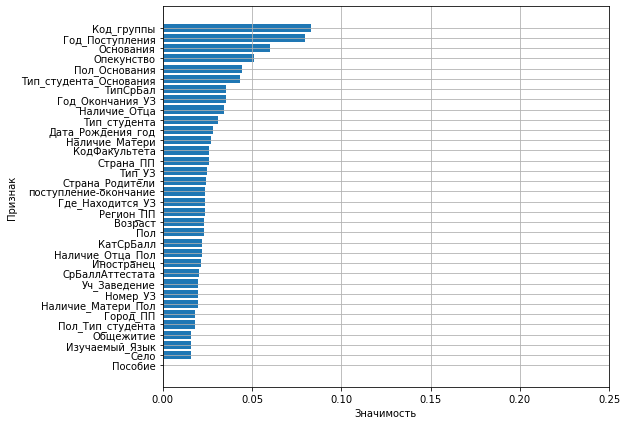

In [ ]:
feature_importance = model.feature_importances_
features_names = np.hstack([num_columns, cat_columns])
sorted = np.argsort(feature_importance)

ypos = np.arange(len(features_names))

fig= plt.figure(figsize=(8,7))
plt.barh(ypos, feature_importance[sorted])
plt.xlim([0,0.25])
plt.ylabel('Признак')
plt.xlabel('Значимость')
plt.grid()
plt.yticks(ypos,features_names[sorted] );

In [ ]:
Submission['Статус'] = model.predict(X_test)
name = 'XGB_Clean_FE_serious_cw_075'
Submission.to_csv(name+'.csv',index = None)
Submission['Статус'].value_counts()/6691

 4    0.618742
 3    0.354656
-1    0.026603
Name: Статус, dtype: float64

In [ ]:
Submission = final_prediction(model,
                              X_train, y_train, 
                              X_test, 
                              Submission,
                              pow = 0.5)
name = 'XGB_Clean_FE_serious_cw_075'
Submission.to_csv(name+'.csv',index = None)
Submission['Статус'].value_counts()/6691

 4    0.629203
 3    0.348378
-1    0.022418
Name: Статус, dtype: float64

In [ ]:
DF_train['Статус'].value_counts()/13584 

 4    0.607259
 3    0.347541
-1    0.045200
Name: Статус, dtype: float64

In [ ]:
Submission['Статус'].value_counts()/6691

 4    0.619638
 3    0.351069
-1    0.029293
Name: Статус, dtype: float64